In [ ]:
# author: Jana Lasser & Almog Simchon

In [94]:
import pandas as pd
import numpy as np
from os.path import join
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt

In [3]:
# colors
demblue = "#0015BC"
repred = "#FF0000"
indgrey = "#696969"

In [4]:
src = "../../data/users"
dst = "../../data/users"
fname = "US_politician_accounts_2010-11-06_to_2022-03-16_rb.csv"
users = pd.read_csv(join(src, fname), dtype={"author_id":str})
users = users.set_index("author_id")

# OLS regression NewsGuard score on belief & truth similarity

## Glove embedding

In [7]:
cols = ["NG_score_mean", "followers_count", "tweet_count", 
        "avg_belief_score_glove", "avg_truth_score_glove", "party"]
subset = users[users["party"].isin(["Democrat", "Republican"])][cols]
mod = smf.ols(formula='NG_score_mean ~ np.log(followers_count) + np.log(tweet_count) + avg_belief_score_glove + avg_truth_score_glove + party + party * avg_belief_score_glove + party * avg_truth_score_glove', data=subset)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NG_score_mean   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     160.4
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          1.23e-158
Time:                        11:53:44   Log-Likelihood:                -2752.0
No. Observations:                1008   AIC:                             5520.
Df Residuals:                    1000   BIC:                             5559.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     89.1562      1.635     54.515      0.000      85.947      92.365
party[T.Republican]                            8.7359      2.205      3.962      0.000       4.409      13.062
np.log(followers_count)                       -0.3007      0.097     -3.102      0.002      -0.491      -0.110
np.log(tweet_count)                            0.1672      0.155      1.078      0.281      -0.137       0.472
avg_belief_score_glove                         9.0436      6.625      1.365      0.173      -3.957      22.045
party[T.Republican]:avg_belief_score_glove  -107.2434      9.731    -11.021      0.000    -126.338     -88.148
avg_truth_score_glove                          3.5243      6.562      0.537      0.591      -9.353      16.401
party[T.Republican]:avg_truth_score_glove     87.3222      9.598      9.098      0.000      68.487     106.158
==============================================================================
Omnibus:                      216.063   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.973
Skew:                          -0.943   Prob(JB):                    8.46e-202
Kurtosis:                       7.300   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Word2vec embedding

In [8]:
cols = ["NG_score_mean", "followers_count", "tweet_count", 
        "avg_belief_score_word2vec", "avg_truth_score_word2vec", "party"]
subset = users[users["party"].isin(["Democrat", "Republican"])][cols]
mod = smf.ols(formula='NG_score_mean ~ np.log(followers_count) + np.log(tweet_count) + avg_belief_score_word2vec + avg_truth_score_word2vec + party + party * avg_belief_score_word2vec + party * avg_truth_score_word2vec', data=subset)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NG_score_mean   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     154.5
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          2.16e-154
Time:                        11:54:28   Log-Likelihood:                -2761.9
No. Observations:                1008   AIC:                             5540.
Df Residuals:                    1000   BIC:                             5579.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        86.4152      2.156     40.078      0.000      82.184      90.646
party[T.Republican]                              13.4051      3.039      4.411      0.000       7.442      19.368
np.log(followers_count)                          -0.2597      0.099     -2.632      0.009      -0.453      -0.066
np.log(tweet_count)                               0.1822      0.158      1.152      0.250      -0.128       0.493
avg_belief_score_word2vec                         7.5809      6.443      1.177      0.240      -5.063      20.224
party[T.Republican]:avg_belief_score_word2vec  -102.7999      9.790    -10.500      0.000    -122.011     -83.589
avg_truth_score_word2vec                         16.6781      8.500      1.962      0.050      -0.001      33.358
party[T.Republican]:avg_truth_score_word2vec     61.2224     11.679      5.242      0.000      38.305      84.140
==============================================================================
Omnibus:                      234.198   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.741
Skew:                          -1.002   Prob(JB):                    2.83e-236
Kurtosis:                       7.670   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Fasstext embedding

In [10]:
cols = ["NG_score_mean", "followers_count", "tweet_count", 
        "avg_belief_score_fasttext", "avg_truth_score_fasttext", "party"]
subset = users[users["party"].isin(["Democrat", "Republican"])][cols]
mod = smf.ols(formula='NG_score_mean ~ np.log(followers_count) + np.log(tweet_count) + avg_belief_score_fasttext + avg_truth_score_fasttext + party + party * avg_belief_score_fasttext + party * avg_truth_score_fasttext', data=subset)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NG_score_mean   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     164.2
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          2.52e-161
Time:                        11:55:07   Log-Likelihood:                -2745.8
No. Observations:                1008   AIC:                             5508.
Df Residuals:                    1000   BIC:                             5547.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        83.7441      2.703     30.978      0.000      78.439      89.049
party[T.Republican]                              14.7985      3.773      3.923      0.000       7.395      22.202
np.log(followers_count)                          -0.2497      0.097     -2.579      0.010      -0.440      -0.060
np.log(tweet_count)                               0.1401      0.155      0.903      0.367      -0.164       0.445
avg_belief_score_fasttext                        15.5730      9.984      1.560      0.119      -4.018      35.164
party[T.Republican]:avg_belief_score_fasttext  -171.6181     14.788    -11.605      0.000    -200.638    -142.598
avg_truth_score_fasttext                          9.5836     10.757      0.891      0.373     -11.525      30.692
party[T.Republican]:avg_truth_score_fasttext    138.4475     15.512      8.925      0.000     108.007     168.888
==============================================================================
Omnibus:                      219.989   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1033.109
Skew:                          -0.932   Prob(JB):                    4.61e-225
Kurtosis:                       7.596   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dictionary robustness

In [42]:
cols = ["NG_score_mean", "followers_count", "tweet_count", "party"]
results = pd.DataFrame()
for i in range(100):
    scores = [f"avg_belief_score_{i}", f"avg_truth_score_{i}"]
    basic_stats = [
        "Intercept", 
        "party[T.Republican]", 
        "np.log(followers_count)",
        "np.log(tweet_count)",
    ]
    stats = [
        "avg_belief_score",
        "avg_truth_score", 
        "party[T.Republican]:avg_belief_score",
        "party[T.Republican]:avg_truth_score"
    ]
    
    subset = users[users["party"].isin(["Democrat", "Republican"])][cols + scores]
    mod = smf.ols(formula=f'NG_score_mean ~ np.log(followers_count) + np.log(tweet_count) + avg_belief_score_{i} + avg_truth_score_{i} + party + party * avg_belief_score_{i} + party * avg_truth_score_{i}', data=subset)
    res = mod.fit()
    row = {"run":i}
    for stat in basic_stats:
        row[stat + "_estimate"] = [res.params[stat]]
        row[stat + "_pval"] = [res.pvalues[stat]]
    for stat in stats:
        row[stat + "_estimate"] = [res.params[stat + f"_{i}"]]
        row[stat + "_pval"] = [res.pvalues[stat + f"_{i}"]]
    results = pd.concat([results, pd.DataFrame(row)])

In [62]:
cols = ["NG_score_mean", "followers_count", "tweet_count", 
        "avg_belief_score_glove", "avg_truth_score_glove", "party"]
subset = users[users["party"].isin(["Democrat", "Republican"])][cols]
mod_glove = smf.ols(formula='NG_score_mean ~ np.log(followers_count) + np.log(tweet_count) + avg_belief_score_glove + avg_truth_score_glove + party + party * avg_belief_score_glove + party * avg_truth_score_glove', data=subset)
res_glove = mod_glove.fit()

cols = ["NG_score_mean", "followers_count", "tweet_count", 
        "avg_belief_score_word2vec", "avg_truth_score_word2vec", "party"]
subset = users[users["party"].isin(["Democrat", "Republican"])][cols]
mod_word2vec = smf.ols(formula='NG_score_mean ~ np.log(followers_count) + np.log(tweet_count) + avg_belief_score_word2vec + avg_truth_score_word2vec + party + party * avg_belief_score_word2vec + party * avg_truth_score_word2vec', data=subset)
res_word2vec = mod_word2vec.fit()

cols = ["NG_score_mean", "followers_count", "tweet_count", 
        "avg_belief_score_fasttext", "avg_truth_score_fasttext", "party"]
subset = users[users["party"].isin(["Democrat", "Republican"])][cols]
mod_fasttext = smf.ols(formula='NG_score_mean ~ np.log(followers_count) + np.log(tweet_count) + avg_belief_score_fasttext + avg_truth_score_fasttext + party + party * avg_belief_score_fasttext + party * avg_truth_score_fasttext', data=subset)
res_fasttext = mod_fasttext.fit()

In [97]:
results.to_csv(join(dst, "OLS_results_dictionary_robustness.csv"), index=False)

In [63]:
fit_results = {
    "glove":res_glove,
    "word2vec":res_word2vec,
    "fasttext":res_fasttext
}

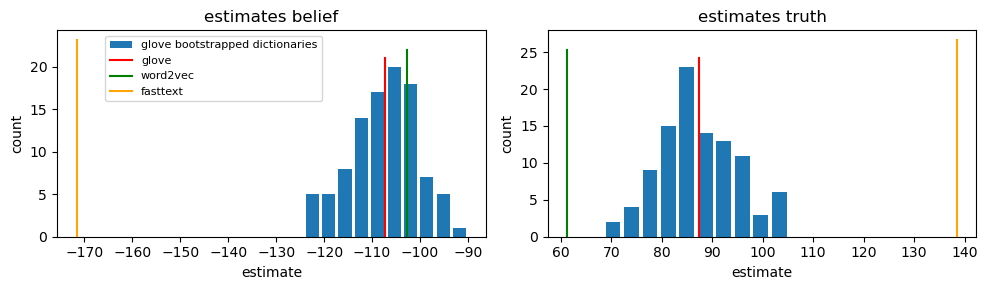

In [90]:
dst = "../../plots"
fname = "dictionary_robustness"

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, comp in zip(axes, ["belief", "truth"]):
    ax.hist(
        results[f"party[T.Republican]:avg_{comp}_score_estimate"],
        rwidth=0.8,
        label="glove bootstrapped dictionaries"
    )
    ax.set_title(f"estimates {comp}")
    ax.set_ylabel("count")
    ax.set_xlabel("estimate")
    
    for embedding, color in zip(["glove", "word2vec", "fasttext"], ["red", "green", "orange"]):
        estimate = fit_results[embedding].params[f"party[T.Republican]:avg_{comp}_score_{embedding}"]
        ax.plot(
            [estimate, estimate], 
            [ax.get_ylim()[0], ax.get_ylim()[1]], 
            color=color,
            label=embedding
        )
axes[0].legend(fontsize=8, loc=2, bbox_to_anchor=[0.1, 0, 1, 1])
fig.tight_layout()
plt.savefig(join(dst, fname + ".png"), bbox_inches="tight", facecolor="white")
plt.savefig(join(dst, fname + ".pdf"), bbox_inches="tight", facecolor="white")
plt.savefig(join(dst, fname + ".svg"), bbox_inches="tight", facecolor="white")

# LME regression NewsGuard score on belief & truth similarity

In [125]:
src = "../../data/tweets"
fname = "US_politician_tweets_2010-11-06_to_2022-03-16_rb.csv.gzip"
cols = [
    "retweeted", # used to filter out retweets
    "author_id", # data grouping: independent random variable
    "party", # characteristic of author: independent fixed variable
    "NG_score" # dependent variable
]
# fixed variables from different embeddings and dictionary versions
fixed_variables = [f"avg_truth_score_{i}" for i in range(100)] + \
                  [f"avg_belief_score_{i}" for i in range(100)] + \
                  ["avg_truth_score_glove", "avg_belief_score_glove",
                   "avg_truth_score_word2vec", "avg_belief_score_word2vec",
                   "avg_truth_score_fasttext", "avg_belief_score_fasttext"]
cols += fixed_variables

tweets = pd.read_csv(
    join(src, fname), 
    dtype={"author_id":str},
    compression="gzip",
    usecols=cols,
)

In [126]:
fixed_variables_name_map = \
    {f"avg_truth_score_{i}":f"truth_{i}" for i in range(100)}
for i in range(100):
    fixed_variables_name_map[f"avg_belief_score_{i}"] = f"belief_{i}"

fixed_variables_name_map["avg_truth_score_glove"] = "truth_glove"
fixed_variables_name_map["avg_belief_score_glove"] = "belief_glove"
fixed_variables_name_map["avg_truth_score_word2vec"] = "truth_word2vec"
fixed_variables_name_map["avg_belief_score_word2vec"] = "belief_word2vec"
fixed_variables_name_map["avg_truth_score_fasttext"] = "truth_fasttext"
fixed_variables_name_map["avg_belief_score_fasttext"] = "belief_fasttext"

In [127]:
tweets = tweets.rename(columns=fixed_variables_name_map)

In [128]:
tweets = tweets[tweets["retweeted"] == False] # remove retweets
tweets = tweets.drop(columns=["retweeted"])
tweets = tweets[tweets["party"].isin(["Democrat", "Republican"])] # remove independents
tweets = tweets.dropna() # remove tweets without NG, belief or truth score

In [129]:
tweet_counts = tweets["author_id"]\
    .value_counts()\
    .reset_index()\
    .rename(columns={"index":"author_id", "author_id":"count"})

In [130]:
# filter out authors with only a single tweet
tweets = tweets[tweets["author_id"].isin(tweet_counts[tweet_counts["count"] > 1]["author_id"])]

In [131]:
tweets["NG"] = tweets["NG_score"] / 100

In [132]:
for col in fixed_variables_name_map.values():
    tweets[col] = tweets[col] - tweets[col].mean()

In [133]:
tweets = tweets.copy()

## Glove embedding

In [156]:
md = smf.mixedlm(
    "NG ~ 1 + belief_glove * truth_glove + belief_glove * truth_glove * party",
    tweets, 
    groups=tweets["author_id"],
    re_formula="~belief_glove * truth_glove"
)
res_glove = md.fit(method=["lbfgs"], maxiter=30000)
res_glove.summary()

/home/jana/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
========================================================================================
Model:                       MixedLM           Dependent Variable:           NG         
No. Observations:            256389            Method:                       REML       
No. Groups:                  1013              Scale:                        0.0122     
Min. group size:             2                 Log-Likelihood:               198504.3487
Max. group size:             1981              Converged:                    Yes        
Mean group size:             253.1                                                      
----------------------------------------------------------------------------------------
                                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                     0.945    0.002 578.279 0.000  0.941  0.948
party[T.Republican]                          -0.068    0.002 -28.582 0.000 -0.072 -0.063
belief_glove                                 -0.001    0.006  -0.106 0.916 -0.013  0.012
belief_glove:party[T.Republican]             -0.146    0.010 -14.885 0.000 -0.166 -0.127
truth_glove                                   0.018    0.006   2.793 0.005  0.005  0.031
truth_glove:party[T.Republican]               0.078    0.010   7.976 0.000  0.059  0.097
belief_glove:truth_glove                      0.007    0.014   0.496 0.620 -0.021  0.035
belief_glove:truth_glove:party[T.Republican] -0.176    0.021  -8.540 0.000 -0.216 -0.136
Group Var                                     0.001    0.001                            
Group x belief_glove Cov                      0.001    0.002                            
belief_glove Var                              0.008    0.009                            
Group x truth_glove Cov                      -0.001    0.002                            
belief_glove x truth_glove Cov               -0.005    0.008                            
truth_glove Var                               0.007    0.009                            
Group x belief_glove:truth_glove Cov          0.001    0.003                            
belief_glove x belief_glove:truth_glove Cov   0.003    0.013                            
truth_glove x belief_glove:truth_glove Cov    0.002    0.013                            
belief_glove:truth_glove Var                  0.028    0.036                            
========================================================================================

"""

## Word2vec embedding

In [157]:
md = smf.mixedlm(
    "NG ~ 1 + belief_word2vec * truth_word2vec + belief_word2vec * truth_word2vec * party",
    tweets, 
    groups=tweets["author_id"],
    re_formula="~belief_word2vec * truth_word2vec"
)
res_word2vec = md.fit(method=["lbfgs"], maxiter=30000)
res_word2vec.summary()

/home/jana/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
================================================================================================
Model:                         MixedLM              Dependent Variable:              NG         
No. Observations:              256389               Method:                          REML       
No. Groups:                    1013                 Scale:                           0.0123     
Min. group size:               2                    Log-Likelihood:                  198184.5199
Max. group size:               1981                 Converged:                       Yes        
Mean group size:               253.1                                                            
------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------
Intercept                                             0.945    0.002 561.498 0.000  0.941  0.948
party[T.Republican]                                  -0.071    0.002 -28.964 0.000 -0.076 -0.066
belief_word2vec                                       0.003    0.006   0.479 0.632 -0.009  0.014
belief_word2vec:party[T.Republican]                  -0.109    0.009 -12.215 0.000 -0.126 -0.091
truth_word2vec                                        0.007    0.007   0.958 0.338 -0.007  0.021
truth_word2vec:party[T.Republican]                   -0.011    0.011  -1.034 0.301 -0.032  0.010
belief_word2vec:truth_word2vec                        0.014    0.049   0.289 0.773 -0.082  0.110
belief_word2vec:truth_word2vec:party[T.Republican]   -0.285    0.073  -3.906 0.000 -0.428 -0.142
Group Var                                             0.001    0.001                            
Group x belief_word2vec Cov                           0.001    0.002                            
belief_word2vec Var                                   0.006    0.007                            
Group x truth_word2vec Cov                           -0.000    0.002                            
belief_word2vec x truth_word2vec Cov                 -0.002    0.007                            
truth_word2vec Var                                    0.008    0.010                            
Group x belief_word2vec:truth_word2vec Cov            0.003    0.012                            
belief_word2vec x belief_word2vec:truth_word2vec Cov -0.001    0.042                            
truth_word2vec x belief_word2vec:truth_word2vec Cov  -0.007    0.050                            
belief_word2vec:truth_word2vec Var                    0.305    0.467                            
================================================================================================

"""

## Fasstext embedding

In [158]:
md = smf.mixedlm(
    "NG ~ 1 + belief_fasttext * truth_fasttext + belief_fasttext * truth_fasttext * party",
    tweets, 
    groups=tweets["author_id"],
    re_formula="~belief_fasttext * truth_fasttext"
)
res_fasttext = md.fit(method=["lbfgs"], maxiter=30000)
res_fasttext.summary()

/home/jana/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
================================================================================================
Model:                         MixedLM              Dependent Variable:              NG         
No. Observations:              256389               Method:                          REML       
No. Groups:                    1013                 Scale:                           0.0123     
Min. group size:               2                    Log-Likelihood:                  198285.5659
Max. group size:               1981                 Converged:                       Yes        
Mean group size:               253.1                                                            
------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------
Intercept                                             0.945    0.002 566.453 0.000  0.941  0.948
party[T.Republican]                                  -0.070    0.002 -29.057 0.000 -0.075 -0.066
belief_fasttext                                       0.009    0.009   0.973 0.331 -0.009  0.026
belief_fasttext:party[T.Republican]                  -0.192    0.014 -14.177 0.000 -0.219 -0.166
truth_fasttext                                       -0.003    0.009  -0.297 0.766 -0.020  0.015
truth_fasttext:party[T.Republican]                    0.087    0.014   6.463 0.000  0.061  0.114
belief_fasttext:truth_fasttext                        0.023    0.058   0.400 0.689 -0.091  0.137
belief_fasttext:truth_fasttext:party[T.Republican]   -0.318    0.086  -3.702 0.000 -0.487 -0.150
Group Var                                             0.001    0.001                            
Group x belief_fasttext Cov                           0.001    0.002                            
belief_fasttext Var                                   0.015    0.017                            
Group x truth_fasttext Cov                           -0.001    0.002                            
belief_fasttext x truth_fasttext Cov                 -0.007    0.014                            
truth_fasttext Var                                    0.012    0.016                            
Group x belief_fasttext:truth_fasttext Cov            0.003    0.014                            
belief_fasttext x belief_fasttext:truth_fasttext Cov -0.005    0.076                            
truth_fasttext x belief_fasttext:truth_fasttext Cov  -0.001    0.076                            
belief_fasttext:truth_fasttext Var                    0.464    0.642                            
================================================================================================

"""

In [159]:
fit_results = {
    "glove":res_glove,
    "word2vec":res_word2vec,
    "fasttext":res_fasttext
}

## Calculate estimates with perturbed dictionaries

In [ ]:
results = pd.DataFrame()
for i in range(100):
    print(i)
    scores = [f"belief_{i}", f"truth_{i}"]
    basic_stats = [
        "Intercept", 
        "party[T.Republican]", 
    ]
    stats = {
        "belief":f"belief_{i}",
        "truth":f"truth_{i}", 
        "belief:party[T.Republican]":f"belief_{i}:party[T.Republican]",
        "truth:party[T.Republican]":f"truth_{i}:party[T.Republican]",
        "belief:truth":f"belief_{i}:truth_{i}",
        "belief:truth:party[T.Republican]":f"belief_{i}:truth_{i}:party[T.Republican]"
    }
    
    md = smf.mixedlm(
        f"NG ~ 1 + belief_{i} * truth_{i} + belief_{i} * truth_{i} * party",
        tweets, 
        groups=tweets["author_id"],
        re_formula=f"~belief_{i} * truth_{i}"
    )
    res = md.fit(method=["lbfgs"], maxiter=30000)
    row = {"run":i}
    for stat in basic_stats:
        row[stat + "_estimate"] = [res.params[stat]]
        row[stat + "_pval"] = [res.pvalues[stat]]
    for stat in stats.keys():
        row[stat + "_estimate"] = [res.params[stats[stat]]]
        row[stat + "_pval"] = [res.pvalues[stats[stat]]]
    results = pd.concat([results, pd.DataFrame(row)])
results.to_csv(join("../../tweets", "LME_results_dictionary_robustness.csv"), index=False)

## Visualize dictionary robustness

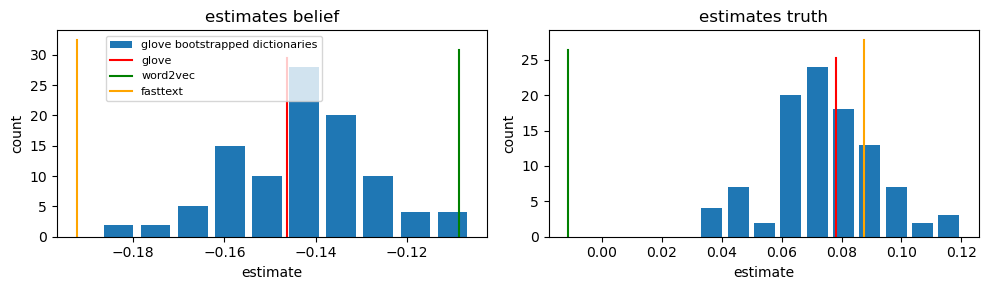

In [163]:
dst = "../../plots"
fname = "dictionary_robustness"

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, comp in zip(axes, ["belief", "truth"]):
    ax.hist(
        results[f"{comp}:party[T.Republican]_estimate"],
        rwidth=0.8,
        label="glove bootstrapped dictionaries"
    )
    ax.set_title(f"estimates {comp}")
    ax.set_ylabel("count")
    ax.set_xlabel("estimate")
    
    for embedding, color in zip(["glove", "word2vec", "fasttext"], ["red", "green", "orange"]):
        estimate = fit_results[embedding].params[f"{comp}_{embedding}:party[T.Republican]"]
        ax.plot(
            [estimate, estimate], 
            [ax.get_ylim()[0], ax.get_ylim()[1]], 
            color=color,
            label=embedding
        )
axes[0].legend(fontsize=8, loc=2, bbox_to_anchor=[0.1, 0, 1, 1])
fig.tight_layout()
plt.savefig(join(dst, fname + ".png"), bbox_inches="tight", facecolor="white")
plt.savefig(join(dst, fname + ".pdf"), bbox_inches="tight", facecolor="white")
plt.savefig(join(dst, fname + ".svg"), bbox_inches="tight", facecolor="white")